## Quick Start Examples

### Knapsack Instance

In the following examples, we will use the item list, weights, values, and weight limits given as follows. These values are taken from the problem statement in [RossettaCode Knapsack: 0-1](https://rosettacode.org/wiki/Knapsack_problem/0-1)

In [1]:
import numpy as np

items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
    ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10),
    )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
Wlimit = 400

### Running Large N Algorithm

In [2]:
from largeN_algo import zero_one_algorithm

soln = zero_one_algorithm(weights = weight_vec, values = value_vec, limit = Wlimit)
for k in range(len(soln)):
    if soln[k] == 1:
        print(items[k][0])

map
compass
water
sandwich
glucose
banana
suntan cream
waterproof trousers
waterproof overclothes
note-case
sunglasses
socks


### Plotting Potential Function

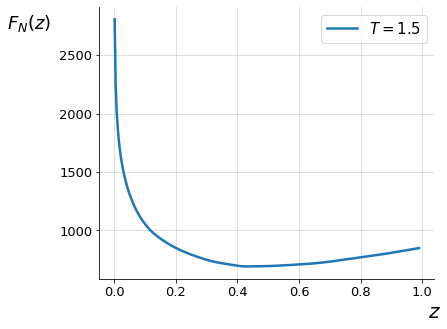

In [3]:
from largeN_algo import plot_potential_zero_one

plot_potential_zero_one(weights = weight_vec, values = value_vec, limit = Wlimit, T= 1.5)

### Plotting Temperature Dependence

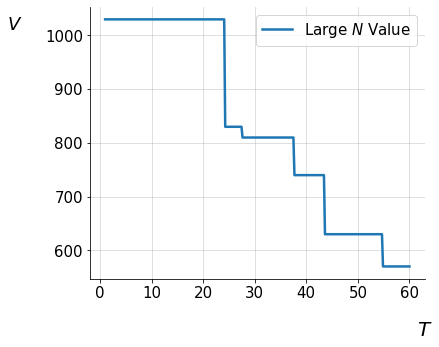

In [4]:
from largeN_algo import plot_value_vs_temp

plot_value_vs_temp(weights = weight_vec, values = value_vec, limit = Wlimit, temp_low=1.0, temp_high = 60.0)

### Algorithm Comparison

In [8]:
from classic_algos import (brute_force, 
                           knapsack01_dpV, 
                           fptas, 
                           greedy, 
                           simann_knapsack)
from largeN_algo import zero_one_algorithm

from tabulate import tabulate
from collections import defaultdict

import time

In [6]:
# dictionary of algorithm names and functions
algo_name_dict = {'Brute': brute_force,
                  'DP': knapsack01_dpV,
                  'FPTAS': fptas,
                  'Greedy': greedy,
                  'Annealing': simann_knapsack,
                  'Large N': zero_one_algorithm}

# dictionary of algorithm names and results
results_name_dict = defaultdict(lambda: list())

for name, func in algo_name_dict.items():
    start_clock = time.time()
    soln  = func(weights = weight_vec, values = value_vec, limit = Wlimit)
    
    # calculating values
    tot_value = str(round(np.dot(value_vec, soln), 0))
    tot_weight = str(round(np.dot(weight_vec, soln), 0))
    time_calc = str(round(time.time()-start_clock, 5)) 
    
    # assembling results
    results_name_dict[name] = [name, tot_value, tot_weight, time_calc]
    
# creating table of results
tabular_results = []
for k, v in results_name_dict.items():
    tabular_results.append(v) 

print(tabulate(tabular_results, ["Algorithm", "Value", "Weight ", "Time (sec)"], tablefmt="grid"))

Stopping annealing because error tolerance was reached
+-------------+---------+-----------+--------------+
| Algorithm   |   Value |   Weight  |   Time (sec) |
+=============+=========+===========+==============+
| Brute       |    1030 |       396 |     34.5579  |
+-------------+---------+-----------+--------------+
| DP          |    1030 |       396 |      0.0052  |
+-------------+---------+-----------+--------------+
| FPTAS       |    1030 |       396 |      0.00448 |
+-------------+---------+-----------+--------------+
| Greedy      |    1030 |       396 |      0.0001  |
+-------------+---------+-----------+--------------+
| Annealing   |     960 |       390 |      0.17645 |
+-------------+---------+-----------+--------------+
| Large N     |    1030 |       396 |      0.00113 |
+-------------+---------+-----------+--------------+


### Knapsack Variations: Bounded

In [7]:
from largeN_algo import bounded_algorithm

items = (("map", 9, 150, 1),("compass", 13, 35, 1), ("water", 153, 200, 3),("sandwich", 50, 60, 2),
         ("glucose", 15, 60, 2),("tin", 68, 45, 3), ("banana", 27, 60, 3),("apple", 39, 40, 3),
            ("cheese", 23, 30, 1),("beer", 52, 10, 3),("suntan cream", 11, 70, 1),("camera", 32, 30, 1),
            ("t-shirt", 24, 15, 2),("trousers", 48, 10, 2),("umbrella", 73, 40, 1),("waterproof trousers", 42, 70, 1),
            ("waterproof overclothes", 43, 75, 1),("note-case", 22, 80, 1),("sunglasses", 7, 20, 1),("towel", 18, 12, 2),
            ("socks", 4, 50, 1),("book", 30, 10, 2),
           )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
bound_vec = np.array([item[3] for item in items])
Wlimit = 400

soln = bounded_algorithm(weights = weight_vec, values = value_vec, bounds=bound_vec, limit = Wlimit, T = 8.10, threshold = 0.51)
print('Item: Item #')
print('-----------')
for k in range(len(soln)):
    if soln[k] == 1:
        print('%s : %i ' % (items[k][0], items[k][3]))
print()        
print('Total Value: %i' % (np.dot(soln, value_vec)))
print('Total Weight: %i' % (np.dot(soln, weight_vec)))

Item: Item #
-----------
map : 1 
compass : 1 
water : 3 
suntan cream : 1 
waterproof trousers : 1 
waterproof overclothes : 1 
note-case : 1 
sunglasses : 1 
socks : 1 

Total Value: 1050
Total Weight: 415
